In [1]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("XYZloan_default_selected_vars.csv")

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,79996,79996,0,39,2,1,12,2017/5/7 13:44,android,...,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0,11.0,OPPO
79996,79996,79997,79997,0,31,1,4,12,2017/6/2 15:54,ios,...,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0,6.0,IPHONE7
79997,79997,79998,79998,0,37,1,1,12,2017/7/9 8:40,android,...,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0,12.0,VIVO
79998,79998,79999,79999,0,38,2,1,12,2017/5/9 10:19,android,...,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0,6.0,XIAOMI


In [4]:
df["AP005"] =  pd.to_datetime(df["AP005"])
df['hour'] = df['AP005'].dt.hour
df['dayofweek'] = df['AP005'].dt.dayofweek
df['day'] = df['AP005'].dt.day
df['month'] = df['AP005'].dt.month
df['year'] = df['AP005'].dt.year

In [5]:
df

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD170,CD172,CD173,MB005,MB007,hour,dayofweek,day,month,year
0,0,1,1,1,31,2,1,12,2017-07-06 10:21:00,ios,...,1449.0,2249.0,2249.0,7.0,IPHONE7,10,3,6,7,2017
1,1,2,2,0,27,1,1,12,2017-04-06 12:51:00,h5,...,-99.0,-99.0,-99.0,NaN,WEB,12,3,6,4,2017
2,2,3,3,0,33,1,4,12,2017-07-01 14:11:00,h5,...,0.0,143.0,110.0,8.0,WEB,14,5,1,7,2017
3,3,4,4,0,34,2,4,12,2017-07-07 10:10:00,android,...,0.0,0.0,0.0,10.0,OPPO,10,4,7,7,2017
4,4,5,5,0,47,2,1,12,2017-07-06 14:37:00,h5,...,-99.0,-99.0,-99.0,NaN,WEB,14,3,6,7,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,79996,79996,0,39,2,1,12,2017-05-07 13:44:00,android,...,764.0,2600.0,1074.0,11.0,OPPO,13,6,7,5,2017
79996,79996,79997,79997,0,31,1,4,12,2017-06-02 15:54:00,ios,...,6426.0,6426.0,6426.0,6.0,IPHONE7,15,4,2,6,2017
79997,79997,79998,79998,0,37,1,1,12,2017-07-09 08:40:00,android,...,2061.0,2501.0,2061.0,12.0,VIVO,8,6,9,7,2017
79998,79998,79999,79999,0,38,2,1,12,2017-05-09 10:19:00,android,...,343.0,514.0,343.0,6.0,XIAOMI,10,1,9,5,2017


## Age

In [6]:
mean = df.groupby('month').mean()['AP001'].tolist()
median = df.groupby('month').median()['AP001'].tolist()
std = df.groupby('month').std()['AP001'].tolist()
month = df['month'].unique().tolist()

In [96]:
def clustered_bar_graph(label,mean,median,std):    
    labels = label

    # create data
    x = np.arange(5)
    y1 = mean
    y2 = median
    y3 = std
    width = 0.2

    # plot data in grouped manner of bar type
    plt.bar(x-0.2, y1, width)#, color='cyan')
    plt.bar(x, y2, width)#, color='orange')
    plt.bar(x+0.2, y3, width)#, color='green')
    plt.xticks(x, labels)
    plt.xlabel("Months")
    plt.ylabel("Metrics")
    plt.legend(["Mean", "Median", "Std. Dev."])
    plt.show()

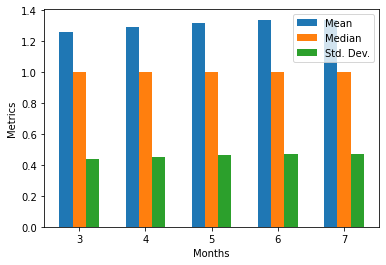

In [59]:
clustered_bar_graph(month,mean,median,std)

## Gender

In [7]:
df.groupby(['month','AP002']).count()['id']

month  AP002
3      1          300
       2          105
4      1        13016
       2         5336
5      1        16170
       2         7609
6      1        16115
       2         8271
7      1         8654
       2         4424
Name: id, dtype: int64

In [49]:
month = ['Mar','Apr','May','Jun','Jul']
one = [300, 13016, 16170, 16115, 8654]
two = [105, 5336, 7609, 8271, 4424]

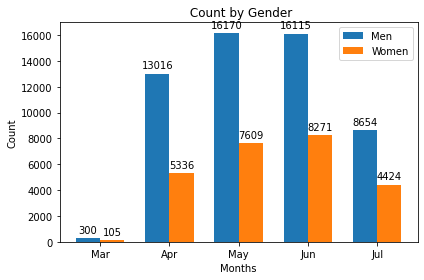

In [38]:
labels = month #['G1', 'G2', 'G3', 'G4', 'G5']
men_means = one #[20, 34, 30, 35, 27]
women_means = two #[25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Months')
ax.set_title(' Count by Gender')
#ax.set_xticks(list(x), labels)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [21]:
list(x)

[0, 1, 2, 3, 4]

In [30]:
labels

['Mar', 'Apr', 'May', 'Jun', 'Jul']

## Default rate

In [43]:
df.groupby(['month','AP002']).sum()['loan_default']

month  AP002
3      1          58
       2          18
4      1        2896
       2         943
5      1        3393
       2        1388
6      1        3160
       2        1390
7      1        1551
       2         691
Name: loan_default, dtype: int64

In [48]:
month = ['Mar','Apr','May','Jun','Jul']
one_default = [58, 2896, 3393, 3160, 1551]
two_default = [18, 943, 1388, 1390, 691]

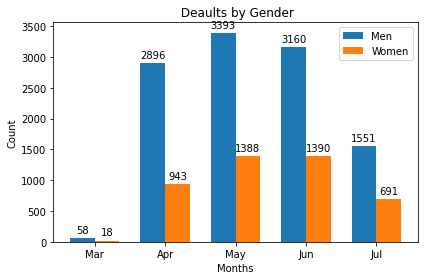

In [47]:
labels = month #['G1', 'G2', 'G3', 'G4', 'G5']
men_means = one #[20, 34, 30, 35, 27]
women_means = two #[25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Months')
ax.set_title(' Deaults by Gender')
#ax.set_xticks(list(x), labels)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [59]:
one_per = [round(i / j * 100,1) for i, j in zip(one_default, one)]
two_per = [round(i / j * 100,1) for i, j in zip(two_default, two)]

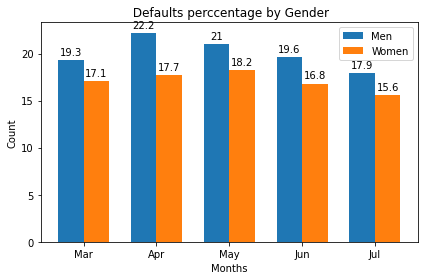

In [61]:
labels = month #['G1', 'G2', 'G3', 'G4', 'G5']
men_means = one_per #[20, 34, 30, 35, 27]
women_means = two_per #[25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Months')
ax.set_title(' Defaults perccentage by Gender')
#ax.set_xticks(list(x), labels)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## Loan Term

In [89]:
df.groupby(['month','AP004']).sum()['loan_default']

month  AP004
3      3           0
       6           2
       9           0
       12         74
4      3          40
       6          72
       9          92
       12       3635
5      3          46
       6         114
       9         128
       12       4493
6      3          38
       6         129
       9         150
       12       4233
7      3          18
       6          65
       9          53
       12       2106
Name: loan_default, dtype: int64

In [81]:
month = ['Mar','Apr','May','Jun']
mar = [9,15,11,370]
apr = [833,931,559,16029]
may = [1059,1176,669,20875]
jun = [977,1186,737,21486]
jul = [532,618,331,11597]

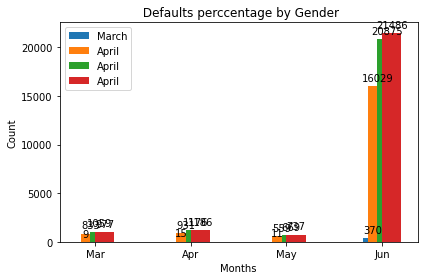

In [88]:
labels = month #['G1', 'G2', 'G3', 'G4', 'G5']
men_means = mar #[20, 34, 30, 35, 27]
women_means = apr #[25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.20#the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/4)*2, mar, width, label='March')
rects2 = ax.bar(x - width/4, apr, width, label='April')
rects3 = ax.bar(x + width/4, may, width, label='April')
rects4 = ax.bar(x + (width/4)*2, jun, width, label='April')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Months')
ax.set_title(' Defaults perccentage by Gender')
#ax.set_xticks(list(x), labels)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()

plt.show()

## Loan Amount

In [117]:
mean = df.groupby(['month']).mean()['CR009']
median = df.groupby(['month']).median()['CR009']
std = df.groupby(['month']).std()['CR009']
month = df['month'].unique().tolist()

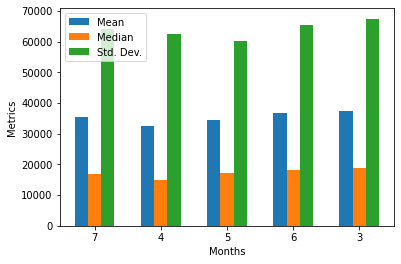

In [118]:
clustered_bar_graph(month,mean,median,std)

In [128]:
mean = df.groupby(['AP004']).mean()['CR009']
median = df.groupby(['AP004']).median()['CR009']
std = df.groupby(['AP004']).std()['CR009']
month = df['AP004'].unique().tolist()

In [129]:
mean

AP004
3     33519.151026
6     33128.604941
9     31960.497182
12    35488.619569
Name: CR009, dtype: float64

In [122]:
median

[14994.5, 15300.0, 16000.0, 17600.0]

In [123]:
std

[69327.68061784683, 62897.68251414361, 59941.04068408279, 63456.70515573326]

In [124]:
month

[12, 3, 6, 9]

In [127]:
df.groupby(['AP004'])

AP004
3     4.806327e+09
6     3.956118e+09
9     3.592928e+09
12    4.026753e+09
Name: CR009, dtype: float64